# Visualize Trace Attributes
*Author: Lennart Ebert (mail@lennart-ebert.de)*
</br></br>

This notebook lets the user visualize the distribution of categorical trace attributes in event logs. It is used in the thesis to visualize changes in attribute value distributions in a generated dataset.

The notebook could be extended to also visualize attributes on event level as well as continuous attributes.

## Setup

In [64]:
import pm4py
import helper
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from pm4py.objects.log.importer.xes import importer as xes_importer
import math
from matplotlib import gridspec
import matplotlib.pyplot as plt
from matplotlib import lines


In [65]:
data_file_path = 'data\\synthetic\\maardji et al 2013_xes_attributes\\logs\\cb\\cb2.5k.xes'

## Load an event log

In [66]:
# load the event log into pm4py
event_log = xes_importer.apply(data_file_path)

parsing log, completed traces :: 100%|██████████| 2500/2500 [00:02<00:00, 877.55it/s] 


In [67]:
# get all categorical attributes

# first, get any attribute
attributes_and_types = helper.automatically_get_attributes_and_data_types(event_log)
print('All attributes:')
display(attributes_and_types)

# second, filter for categorical trace attributes
categorical_trace_attributes = [attribute_name for attribute_name, level, type in attributes_and_types if (level == 'trace') and (type == 'categorical')]
print('Categorical trace attributes:')
display(categorical_trace_attributes)

All attributes:


[('concept:name', 'trace', 'categorical'),
 ('relevant_attribute_01', 'trace', 'categorical'),
 ('relevant_attribute_02', 'trace', 'categorical'),
 ('relevant_attribute_03', 'trace', 'categorical'),
 ('relevant_attribute_04', 'trace', 'categorical'),
 ('relevant_attribute_05', 'trace', 'categorical'),
 ('irrelevant_attribute_01', 'trace', 'categorical'),
 ('irrelevant_attribute_02', 'trace', 'categorical'),
 ('irrelevant_attribute_03', 'trace', 'categorical'),
 ('irrelevant_attribute_04', 'trace', 'categorical'),
 ('irrelevant_attribute_05', 'trace', 'categorical'),
 ('concept:name', 'event', 'categorical'),
 ('lifecycle:transition', 'event', 'categorical'),
 ('time:timestamp', 'event', 'categorical'),
 ('org:resource', 'event', 'categorical')]

Categorical trace attributes:


['concept:name',
 'relevant_attribute_01',
 'relevant_attribute_02',
 'relevant_attribute_03',
 'relevant_attribute_04',
 'relevant_attribute_05',
 'irrelevant_attribute_01',
 'irrelevant_attribute_02',
 'irrelevant_attribute_03',
 'irrelevant_attribute_04',
 'irrelevant_attribute_05']

In [68]:
# remove the concept name from the selected attributes
selected_attributes = categorical_trace_attributes
selected_attributes.remove('concept:name')

In [69]:
# retrieve the trace attribute data
trace_attributes_data = {}

# create empty value lists for each trace attribute
for trace_attribute_name in categorical_trace_attributes:
    trace_attributes_data[trace_attribute_name] = []

for trace in event_log:
    for trace_attribute_name in categorical_trace_attributes:
        if trace_attribute_name in trace.attributes:
            trace_attributes_data[trace_attribute_name].append(trace.attributes[trace_attribute_name])
        else:
            trace_attributes_data[trace_attribute_name].append(None)

print(str(trace_attributes_data)[:1000])

{'relevant_attribute_01': ['value_2', 'value_1', 'value_2', 'value_2', 'value_1', 'value_1', 'value_2', 'value_2', 'value_1', 'value_2', 'value_2', 'value_2', 'value_2', 'value_1', 'value_1', 'value_2', 'value_1', 'value_1', 'value_2', 'value_1', 'value_2', 'value_2', 'value_1', 'value_1', 'value_2', 'value_2', 'value_2', 'value_2', 'value_2', 'value_2', 'value_2', 'value_2', 'value_2', 'value_2', 'value_2', 'value_2', 'value_1', 'value_1', 'value_2', 'value_1', 'value_1', 'value_1', 'value_2', 'value_2', 'value_1', 'value_2', 'value_2', 'value_2', 'value_2', 'value_2', 'value_2', 'value_2', 'value_1', 'value_1', 'value_1', 'value_1', 'value_2', 'value_2', 'value_2', 'value_2', 'value_2', 'value_2', 'value_2', 'value_2', 'value_2', 'value_1', 'value_1', 'value_2', 'value_1', 'value_2', 'value_1', 'value_1', 'value_2', 'value_2', 'value_1', 'value_2', 'value_1', 'value_2', 'value_2', 'value_1', 'value_2', 'value_2', 'value_2', 'value_2', 'value_2', 'value_2', 'value_2', 'value_2', 'valu

## Visualization
For each attribute, visualize the moving frequency of attribute occurences
attribute

In [70]:
def get_value_distribution(attribute_series, window_size=200):
    # get the value distribution for a distinct attribute series as a dataframe
    value_counts = {}
    for i in range(len(attribute_series)-window_size):
        window_start = i
        window_end = i + window_size

        window = attribute_series[window_start:window_end]
        value_counts[window_end] = window.value_counts(normalize=True).to_dict()
    
    # create data frame from value counts
    df = pd.DataFrame().from_dict(value_counts, orient='index')
    return df

In [71]:
attribute_distributions = {}
for attribute_name, attribute_data in trace_attributes_data.items():
    # convert the attribute data into a series
    attribute_series = pd.Series(attribute_data)    

    # get the value distributions 
    attribute_distributions[attribute_name] = get_value_distribution(attribute_series)

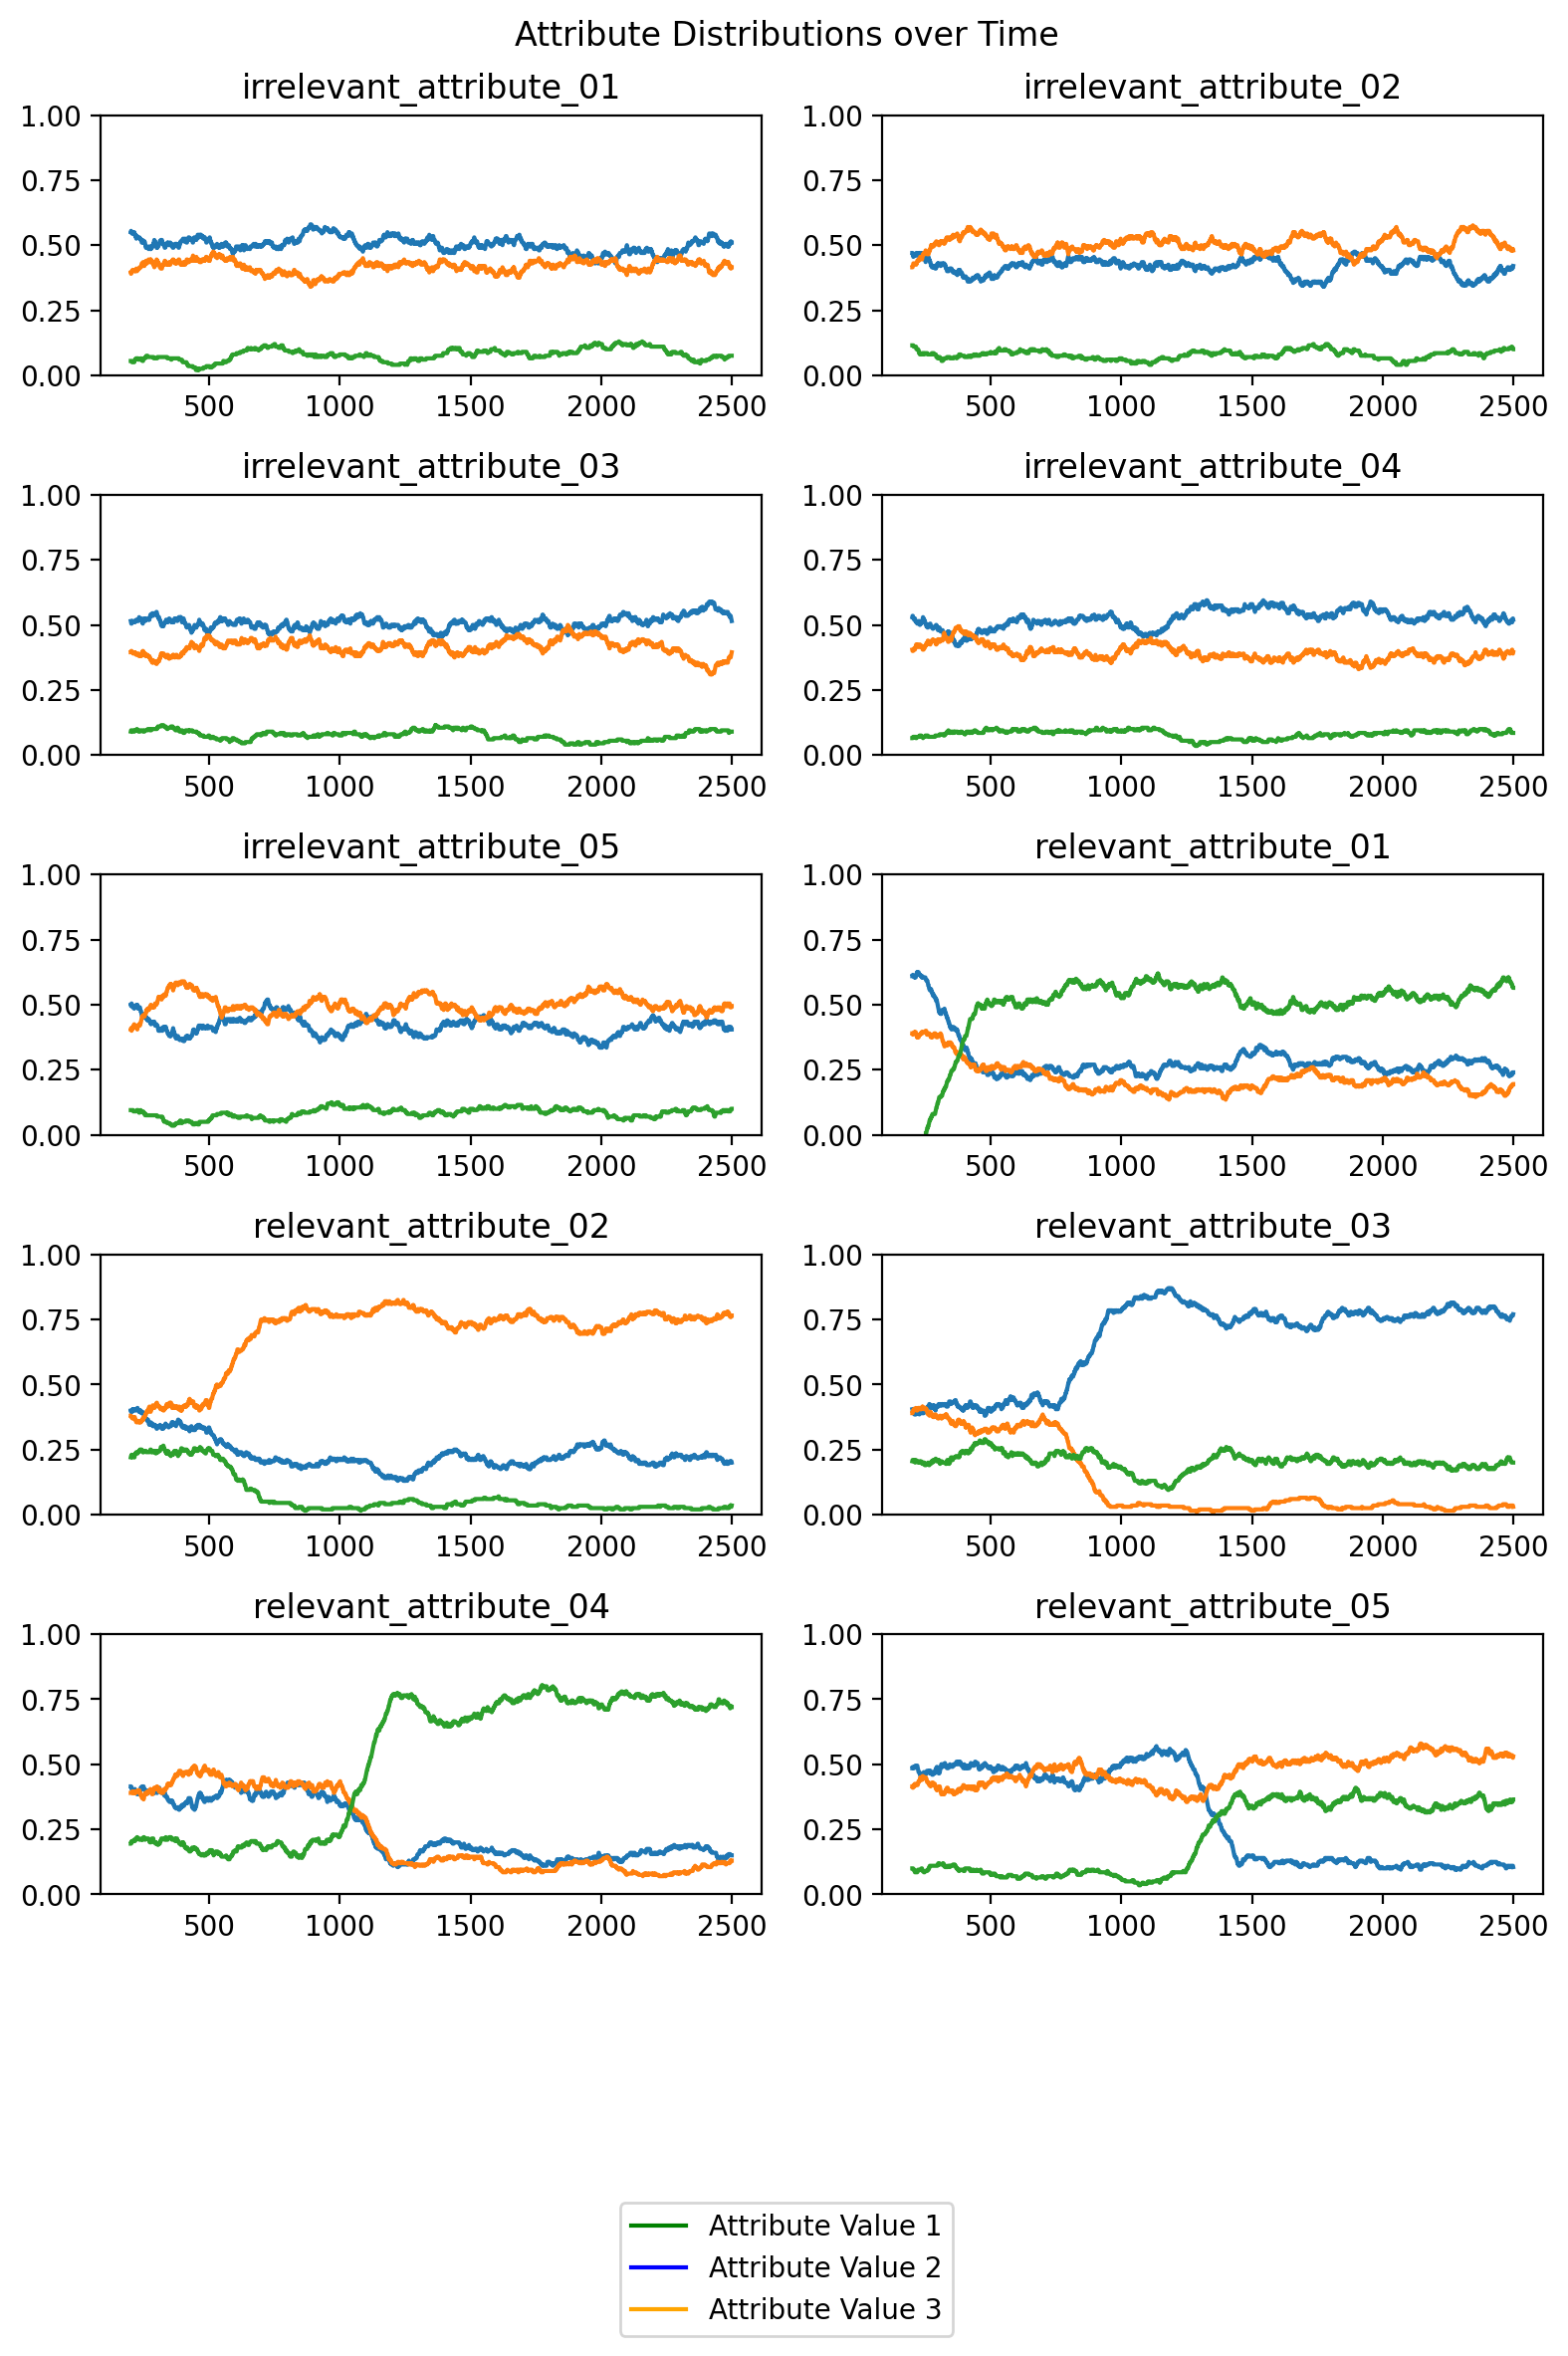

In [72]:
columns = 2

# plot all attribute distributions in a plot with subplots
n = len(attribute_distributions.keys())
rows = max(1, int(math.ceil(n / columns))) # set the row count to at least 1

gs = gridspec.GridSpec(rows, columns)
fig = plt.figure(dpi=200, figsize = (8,2*rows))

# get sorted attribute list
attribute_list = sorted(list(attribute_distributions.keys()))

# plot all attribute distributions
for i, attribute_name in enumerate(attribute_list):
    series = attribute_distributions[attribute_name]
    ax = fig.add_subplot(gs[i])
    ax.plot(series)
    # set the y axis to 0 - 1
    plt.ylim(0, 1)
    ax.title.set_text(attribute_name)

# create the legend
legend_elements = [lines.Line2D([0], [0], color='green', linestyle='solid', label='Attribute Value 1'),
    lines.Line2D([0], [0], color='blue', linestyle='solid', label=f'Attribute Value 2'),
    lines.Line2D([0], [0], color='orange', linestyle='solid', label=f'Attribute Value 3')
]

fig.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.19))


# add a title
fig.suptitle('Attribute Distributions over Time')

fig.tight_layout()

plt.show()